First, make sure to install any necessary packages in order to run the package!

In [7]:
#!pip install openmeteo-requests requests-cache retry-requests

Import the functions necessary from the package.

In [8]:
from weather386.forecast import get_forecast
from weather386.history1 import get_history
from weather386.join_clean import join_clean
from weather386.combined_graph import combined_graph

## Forecast function
This function takes two arguments, latitude and longitude. The values you input for the forecast function will determine where the weather forecast will be taken from.
This function will use the National Weather Service's free API to pull the weather forecast. It returns a list of dataframes that will later be cleaned and combined.

In [9]:
latitude = 39.0997
longitude = -94.5786

forecast = get_forecast(latitude,longitude)

## history function
This function takes in the same arguments as the forecast function.
This function will use OpenMeteo's free(non-commercial use) API to pull the historical weather back to 1950. It will then perform some basic data cleaning to set each column as the right datatype. This code is provided by OpenMeteo in order to make easier use of their API. 

In [10]:
history = get_history(latitude,longitude)
history.head(5)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,wind_speed_10m
0,1950-01-01 00:00:00+00:00,48.571701,97.998253,48.0317,0.0,0.0,0.0,3.163596
1,1950-01-01 01:00:00+00:00,47.304501,99.325027,47.1245,0.0,0.0,0.0,3.421952
2,1950-01-01 02:00:00+00:00,47.124500,99.324478,46.9445,0.0,0.0,0.0,3.689355
3,1950-01-01 03:00:00+00:00,47.034500,99.324234,46.8545,0.0,0.0,0.0,4.082141
4,1950-01-01 04:00:00+00:00,46.944500,99.661484,46.8545,0.0,0.0,0.0,4.496315


## forecast_clean function
This function takes your forecast dataframes from get_forecast. It... 
1. Expands any irregular intervals into hourly intervals
2. Converts celcius to fahrenheigt
3. Renames columns as needed
4. Merges each dataframe into a single dataframe by date

Returned is a clean forecast dataframe to use in conjunction with an already cleaned history dataframe for analysis.

In [11]:
forecast_clean = join_clean(forecast)
forecast_clean.head(5)

,validTime,temperature,dewpoint,maxTemperature,minTemperature,relativeHumidity,windDirection,windSpeed,precipitation,snowfall
0,2023-12-16 00:00:00+00:00,47.0,45.0,53.0,NaN,93.0,50.0,5.556,5.08,0.0
1,2023-12-16 01:00:00+00:00,46.0,45.0,53.0,41.0,96.0,70.0,7.408,5.08,0.0
2,2023-12-16 02:00:00+00:00,46.0,45.0,NaN,41.0,96.0,70.0,5.556,5.08,0.0
3,2023-12-16 03:00:00+00:00,46.0,44.0,NaN,41.0,93.0,90.0,7.408,5.08,0.0
4,2023-12-16 04:00:00+00:00,46.0,44.0,NaN,41.0,93.0,80.0,7.408,5.08,0.0


## Combined_graph function

This combined_graph function does 2 main things
1. Calls the precip_graph, temp_graph, and wind_graph functions which graph each respective variable
2. stiches each graph together on one graph

This function returns the beautiful end product graph!

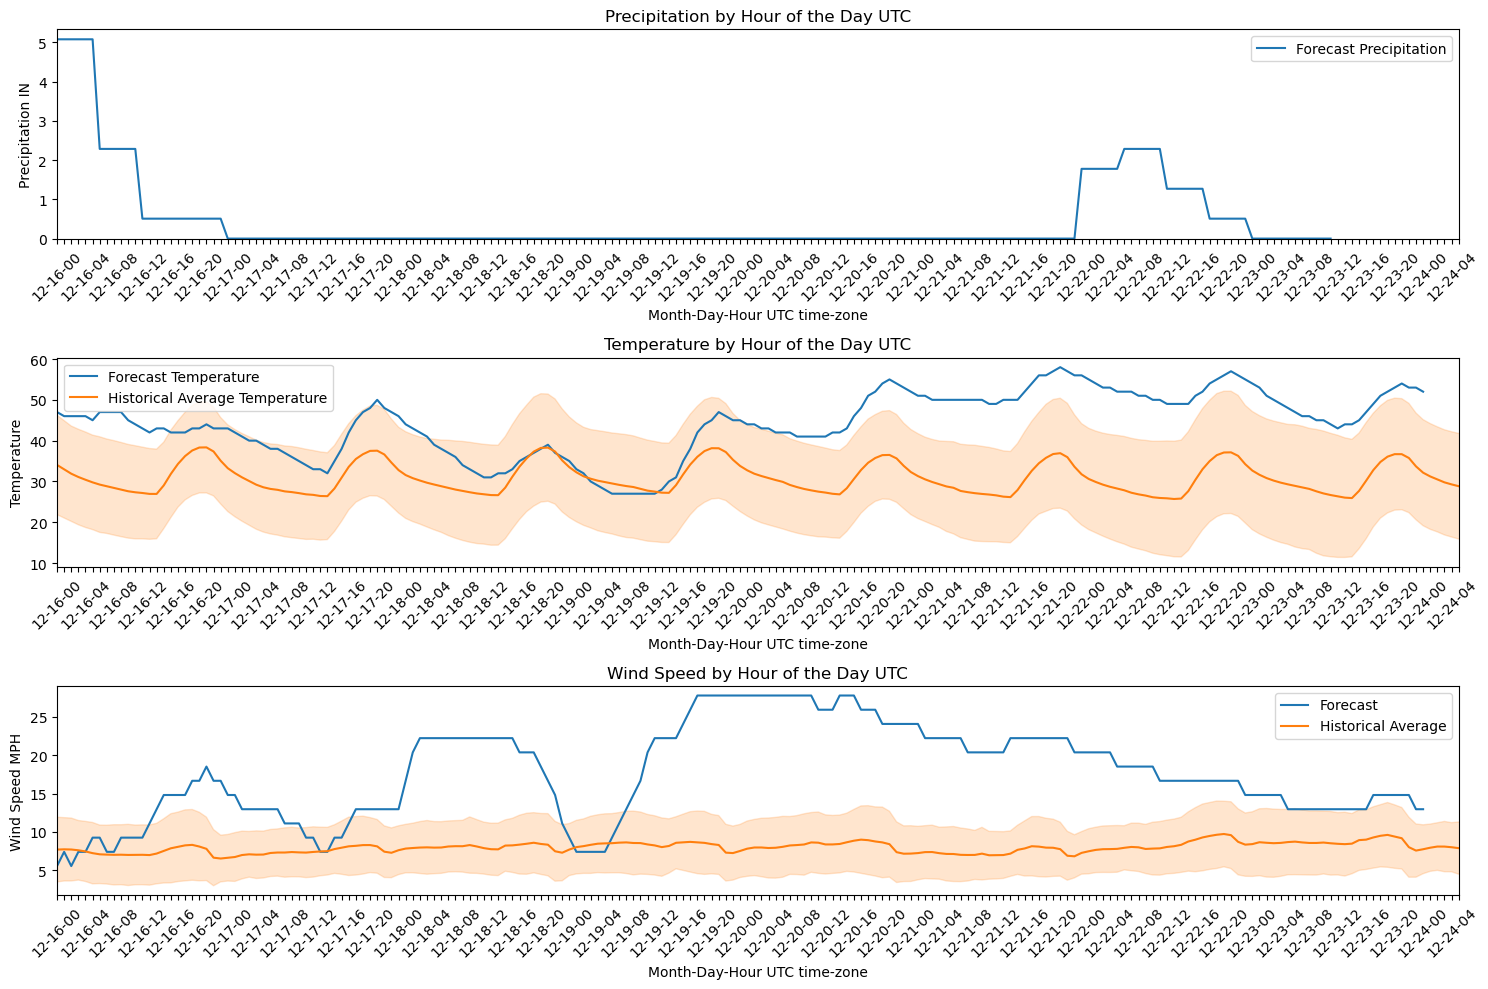

In [12]:
combined_graph(history, forecast_clean)